# Building Heights - Over Time Changes Analysis and the Influencing Factors




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data of building heights in New York during the years:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp '/content/drive/MyDrive/Building_Footprints_20250228.zip' '.'

In [4]:
!unzip '/content/Building_Footprints_20250228.zip'

Archive:  /content/Building_Footprints_20250228.zip
  inflating: Building_Footprints_20250228.csv  


In [5]:
file_path = '/content/Building_Footprints_20250228.csv'
columns_needed = ['BIN', 'CNSTRCT_YR', 'HEIGHTROOF', 'FEAT_CODE']
output_file = '/content/filtered_data.csv'

In [6]:
data = pd.read_csv(file_path)
data

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082805,MULTIPOLYGON (((-73.88892338272062 40.67722493...,NaN,3000000,NaN,02/21/2025,Constructed,1303178,11.000000,2100,42.0,0,0,3039490044,3039490044,Other (Man,{6BD8350D-AFA9-4101-8CBF-227FE2865D47}
1082806,MULTIPOLYGON (((-74.24711493600458 40.50882220...,NaN,5175262,2024.0,02/21/2025,Constructed,1303179,35.000000,2100,69.0,0,0,5079150003,5079150003,Other (Man,{75A16AF1-870A-4490-A3BB-D66F34BD7FFC}
1082807,MULTIPOLYGON (((-74.2470744361661 40.508846278...,NaN,5175261,2024.0,02/21/2025,Constructed,1303180,32.000000,2100,69.0,0,0,5079150005,5079150005,Other (Man,{7EA6481B-096C-4C47-9F40-E68BF6139B5F}
1082808,MULTIPOLYGON (((-73.91668574041859 40.64159261...,NaN,3421946,2020.0,02/21/2025,Constructed,1303181,21.000000,2100,15.0,0,0,3079610054,3079610054,Other (Man,{76F7B7BD-18CD-4F1E-865C-DA17B2718D03}


## Data analysis:

In [7]:
feature_code_names = {
  1000: 'Parking',
  1001: 'Gas Station Canopy',
  1002: 'Storage Tank',
  1003: 'Placeholder',
  1004: 'Auxiliary Structure',
  1005: 'Temporary Structure',
  1006: 'Cantilevered Building',
  2100: 'Building',
  2110: 'Skybridge',
  5100: 'Building Under Construction',
  5110: 'Garage'
}

In [8]:
data['FEAT_CODE_NAME'] = data['FEAT_CODE'].map(feature_code_names)

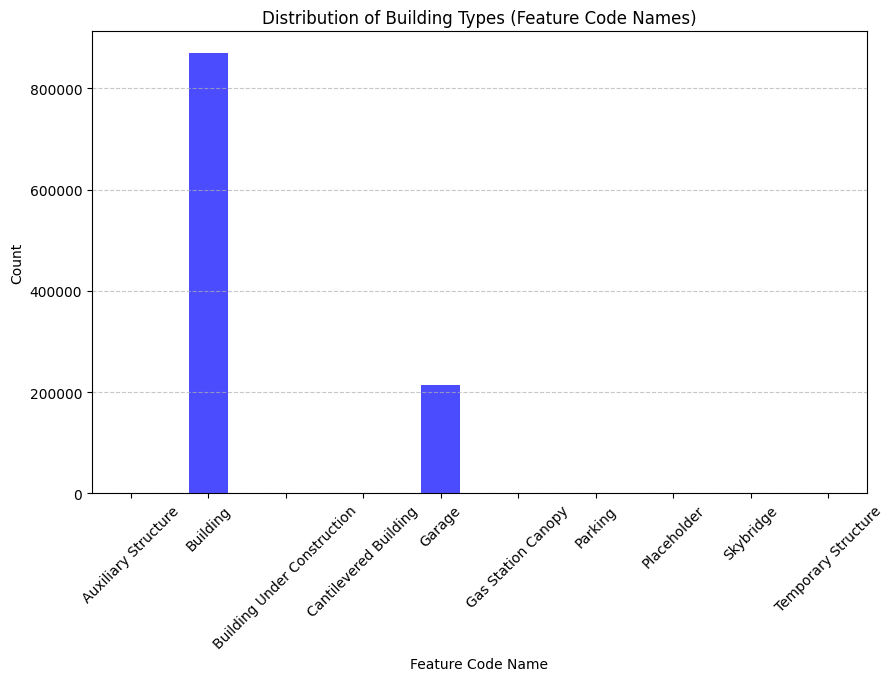

In [9]:
plt.figure(figsize=(10, 6))
data['FEAT_CODE_NAME'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Feature Code Name')
plt.ylabel('Count')
plt.title('Distribution of Building Types (Feature Code Names)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most of the data are buildings and its exactly what we want to concentrate on, so we will continue the analysis with them only:

In [37]:
# Filter the constructed buildings only starting at 1900
buildings_data = data[(data['FEAT_CODE_NAME'] == 'Building') &
                      (data['LSTSTATYPE'] == 'Constructed') &
                      (data['CNSTRCT_YR'] >= 1900) &
                      (data['HEIGHTROOF']) > 0]

buildings_data

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID,FEAT_CODE_NAME
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F},Building
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520},Building
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068},Building
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF},Building
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D},Building
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082803,MULTIPOLYGON (((-74.14965641536554 40.62207710...,NaN,5169100,1986.0,01/22/2019,Constructed,1273344,33.000000,2100,33.0,0,0,5014890001,5014897503,Other (Man,{16070DEB-8C76-4D30-A970-456CA87CBA8E},Building
1082806,MULTIPOLYGON (((-74.24711493600458 40.50882220...,NaN,5175262,2024.0,02/21/2025,Constructed,1303179,35.000000,2100,69.0,0,0,5079150003,5079150003,Other (Man,{75A16AF1-870A-4490-A3BB-D66F34BD7FFC},Building
1082807,MULTIPOLYGON (((-74.2470744361661 40.508846278...,NaN,5175261,2024.0,02/21/2025,Constructed,1303180,32.000000,2100,69.0,0,0,5079150005,5079150005,Other (Man,{7EA6481B-096C-4C47-9F40-E68BF6139B5F},Building
1082808,MULTIPOLYGON (((-73.91668574041859 40.64159261...,NaN,3421946,2020.0,02/21/2025,Constructed,1303181,21.000000,2100,15.0,0,0,3079610054,3079610054,Other (Man,{76F7B7BD-18CD-4F1E-865C-DA17B2718D03},Building


#### Distribution of Building Heights:

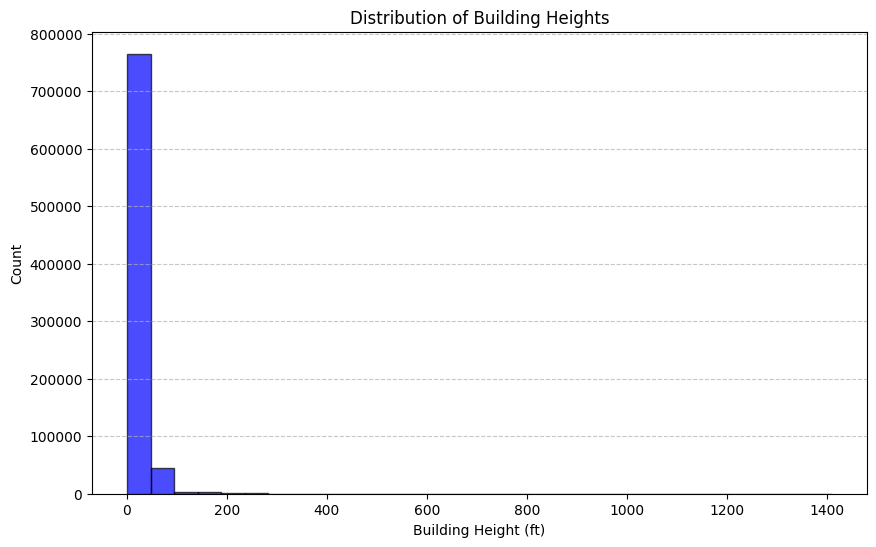

In [38]:
# Distribution of Building Heights
plt.figure(figsize=(10, 6))
plt.hist(buildings_data['HEIGHTROOF'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Building Height (ft)')
plt.ylabel('Count')
plt.title('Distribution of Building Heights')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Average Building Height Over Decades:

In [39]:
buildings_data['Decade'] = (buildings_data['CNSTRCT_YR'] // 10) * 10

<ipython-input-39-c1e98ec608f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings_data['Decade'] = (buildings_data['CNSTRCT_YR'] // 10) * 10


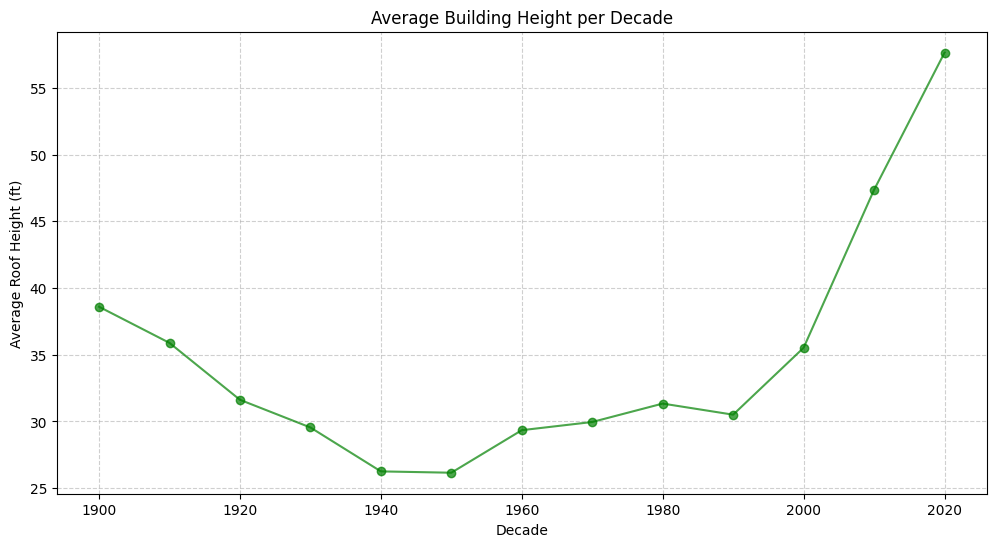

In [40]:
avg_height_by_decade = buildings_data.groupby('Decade')['HEIGHTROOF'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_height_by_decade.index, avg_height_by_decade.values, marker='o', linestyle='-', color='green', alpha=0.7)
plt.xlabel('Decade')
plt.ylabel('Average Roof Height (ft)')
plt.title('Average Building Height per Decade')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Median Building Height Over Decades:

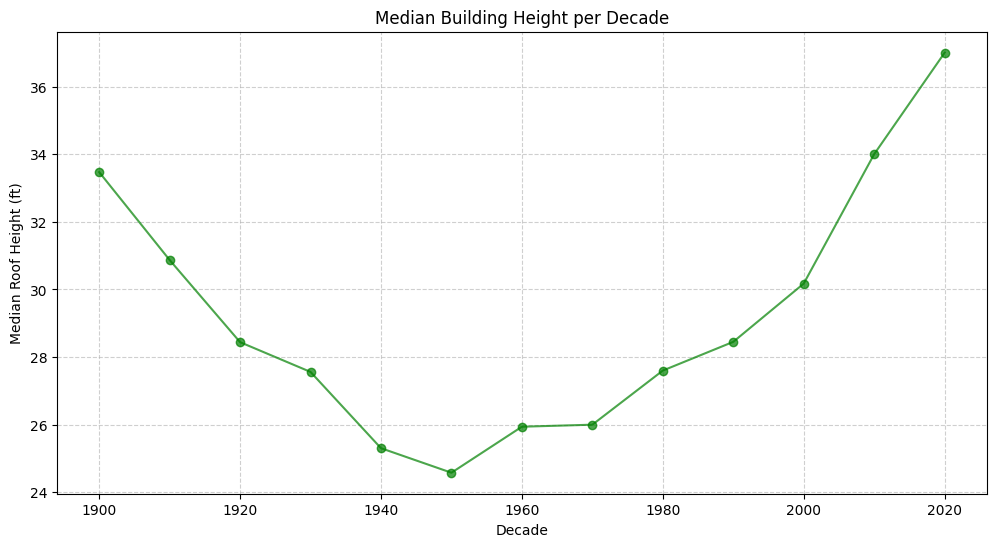

In [41]:
median_height_by_decade = buildings_data.groupby('Decade')['HEIGHTROOF'].median()

plt.figure(figsize=(12, 6))
plt.plot(median_height_by_decade.index, median_height_by_decade.values, marker='o', linestyle='-', color='green', alpha=0.7)
plt.xlabel('Decade')
plt.ylabel('Median Roof Height (ft)')
plt.title('Median Building Height per Decade')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

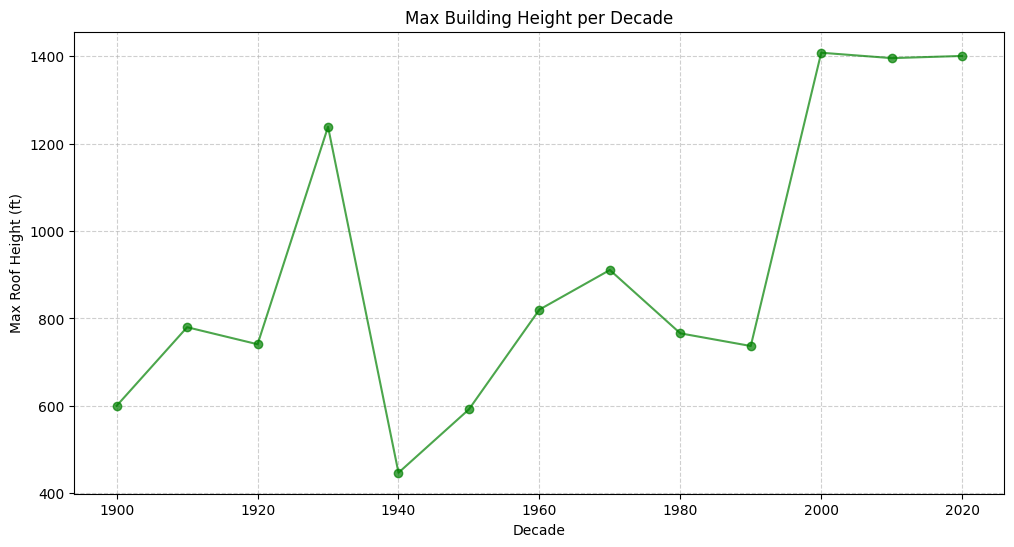

In [51]:
max_height_by_decade = buildings_data.groupby('Decade')['HEIGHTROOF'].max()

plt.figure(figsize=(12, 6))
plt.plot(max_height_by_decade.index, max_height_by_decade.values, marker='o', linestyle='-', color='green', alpha=0.7)
plt.xlabel('Decade')
plt.ylabel('Max Roof Height (ft)')
plt.title('Max Building Height per Decade')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

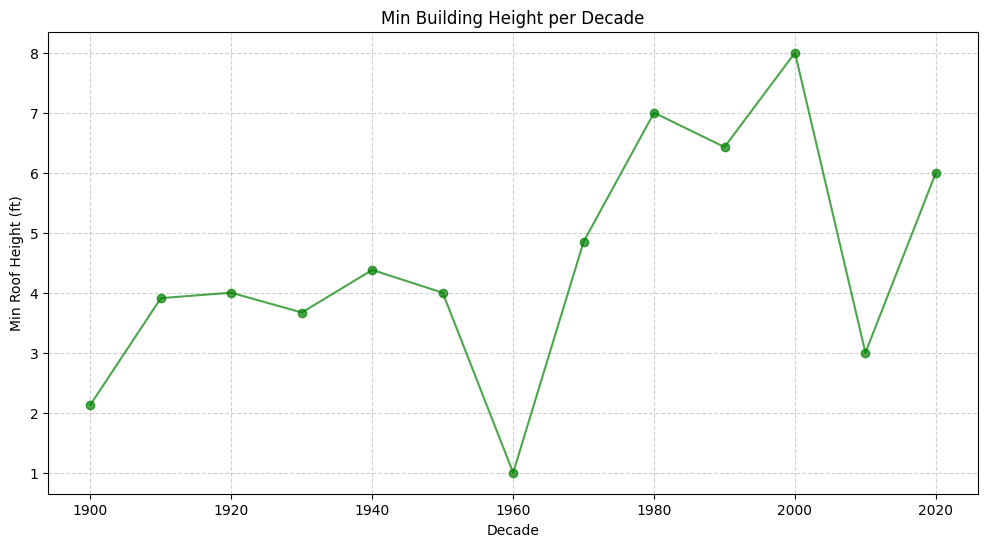

In [43]:
min_height_by_decade = buildings_data.groupby('Decade')['HEIGHTROOF'].min()

plt.figure(figsize=(12, 6))
plt.plot(min_height_by_decade.index, min_height_by_decade.values, marker='o', linestyle='-', color='green', alpha=0.7)
plt.xlabel('Decade')
plt.ylabel('Min Roof Height (ft)')
plt.title('Min Building Height per Decade')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<ipython-input-49-9af37d90d6f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings_data['Height_Ground_Ratio'] = buildings_data['HEIGHTROOF'] / buildings_data['GROUNDELEV'].replace(0, np.nan)


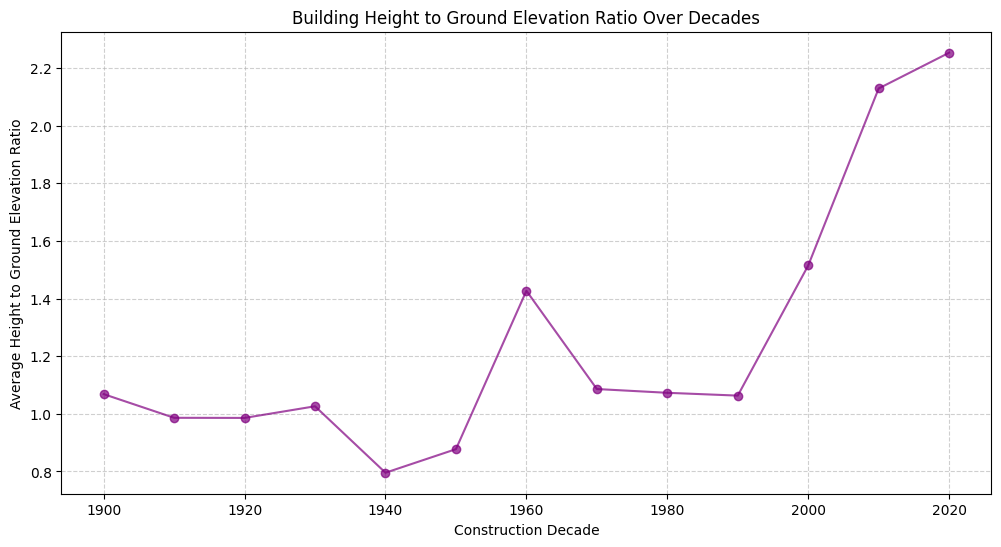

In [49]:
# Calculate the ratio of Building Height to Ground Elevation
buildings_data['Height_Ground_Ratio'] = buildings_data['HEIGHTROOF'] / buildings_data['GROUNDELEV'].replace(0, np.nan)

# Compute the average ratio per year
ratio_over_decades = buildings_data.groupby('Decade')['Height_Ground_Ratio'].mean()

# Plot the ratio over time
plt.figure(figsize=(12, 6))
plt.plot(ratio_over_decades.index, ratio_over_decades.values, marker='o', linestyle='-', color='purple', alpha=0.7)
plt.xlabel('Construction Decade')
plt.ylabel('Average Height to Ground Elevation Ratio')
plt.title('Building Height to Ground Elevation Ratio Over Decades')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

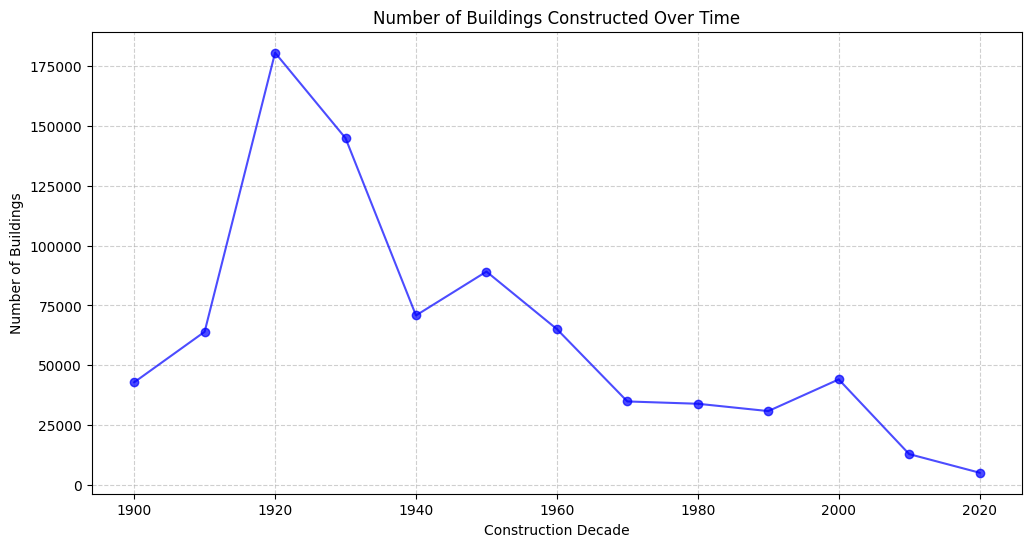

In [48]:
# Number of Buildings Constructed Over Time
buildings_per_decade = buildings_data['Decade'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(buildings_per_decade.index, buildings_per_decade.values, marker='o', linestyle='-', color='blue', alpha=0.7)
plt.xlabel('Construction Decade')
plt.ylabel('Number of Buildings')
plt.title('Number of Buildings Constructed Over Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()